In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import os
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import tensorflow.keras as keras
import math
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization,Activation,Add
from tensorflow.keras import activations
import cv2
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
import albumentations as A
from collections import Counter
np.random.seed(42)
tf.random.set_seed(42)

2022-06-03 00:30:16.694598: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
cleaned = dict()
cleaned['image_name'] = []
cleaned['labels'] = []
cleaned['image_path'] = []

for label in os.listdir('../dataset/clean_/'):
    for image in os.listdir('../dataset/clean_/'+label):
        cleaned['image_name'].append(image)

    for _ in range(len(os.listdir('../dataset/clean_/'+label))):
        cleaned['labels'].append(label)

    for path in os.listdir('../dataset/clean_/'+label):
        cleaned['image_path'].append('clean_/'+label+'/'+path)

In [3]:
cleaned = pd.DataFrame(cleaned)
cleaned.labels=cleaned.labels.apply(lambda x:x.split('-'))
cleaned

,image_name,labels,image_path
0,1646467817169.png,[blines],clean_/blines/1646467817169.png
1,LEFT_POST_UPPER_LONG-12_59_25.jpeg,[blines],clean_/blines/LEFT_POST_UPPER_LONG-12_59_25.jpeg
2,left_upper_post_long-23_8_21.png,[blines],clean_/blines/left_upper_post_long-23_8_21.png
3,RT_POST_UPPER_LONG-21_49_49.png,[blines],clean_/blines/RT_POST_UPPER_LONG-21_49_49.png
4,LEFT_POST_UPPER_LONG-17_34_51.jpeg,[blines],clean_/blines/LEFT_POST_UPPER_LONG-17_34_51.jpeg
...,...,...,...
1206,RT_POST_LOWER_TRANS-13_46_38.jpeg,[effusion],clean_/effusion/RT_POST_LOWER_TRANS-13_46_38.jpeg
1207,RT_LAT_LOWER_LONG-12_57_44.jpeg,[effusion],clean_/effusion/RT_LAT_LOWER_LONG-12_57_44.jpeg
1208,LT_UPPER_LAT_TRANS-11_40_51.jpeg,[effusion],clean_/effusion/LT_UPPER_LAT_TRANS-11_40_51.jpeg
1209,RT_POST_LOWER_TRANS-13_59_45.jpeg,[effusion],clean_/effusion/RT_POST_LOWER_TRANS-13_59_45.jpeg


In [ ]:
# def rename_labels1(label):
#     if '-' in label:
#         label=label.replace('-','')
#     if '_' in label:
#         label=label.replace('_','')
#     if ' ' in label:
#         label = label.replace(' ','')

#     return label.lower()

# def rename_labels2(label):
#     if 'ablines' in label:
#         label =label.replace('ablines','alines,blines')
#     if 'a,blines' in label:
#         label =label.replace('a,blines','alines,blines')
#     if 'consolidations' in label:
#         label = label.replace('consolidations','consolidation')
    
#     return label


# def combine_f(label):
#     x = rename_labels1(label)
#     x = rename_labels2(x)
#     x =  x.split(',')
#     return x

In [ ]:
# df['pre_labels']=df.labels.str.split('-')
# df

In [ ]:
# df.pre_labels.value_counts()

In [ ]:
# mlb = MultiLabelBinarizer()
# binarized = mlb.fit_transform(df.pre_labels)
# df[mlb.classes_] = binarized

In [ ]:
# print(mlb.classes_)

In [ ]:
data = pd.read_csv('../inputs/trainset.csv')

In [ ]:
data=data.rename(columns={'Normal':'alines','>3 B-lines':'blines','Consolidation':'consolidation','Effusion':'effusion'})

In [ ]:
data.image=data.image.apply(lambda x:x.replace(' ','_'))

In [ ]:
data=data[data.image.isin(cleaned.image_name.values.tolist())]

In [ ]:
data.image=data.image.apply(lambda x: '../dataset/extracted/'+x)

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)
sns.barplot(x = ['alines','blines','consolidation','effusion'],y=data[['alines','blines','consolidation','effusion']].sum())
plt.ylabel('Counts')
plt.xlabel('Artefacts')
plt.show()

In [ ]:
# data1 = dict()
# data1['image_name'] = []
# data1['labels'] = []
# data1['image_path'] = []

# for label in os.listdir('../dataset/Combined/'):
#     for image in os.listdir('../dataset/Combined/'+label):
#         data1['image_name'].append(image)

#     for _ in range(len(os.listdir('../dataset/Combined/'+label))):
#         data1['labels'].append(label)

#     for path in os.listdir('../dataset/Combined/'+label):
#         data1['image_path'].append('Combined/'+label+'/'+path)

In [ ]:
# df2 = pd.DataFrame(data1)
# df2

In [ ]:
# df2['pre_labels']=df2.labels.apply(combine_f)

In [ ]:
# mlb = MultiLabelBinarizer()
# binarized = mlb.fit_transform(df2.pre_labels)
# df2[mlb.classes_] = binarized

In [ ]:
# df2=df2.drop(columns=['image_name','labels','pre_labels'])
# df2=df2.rename(columns={'image_path':'image'})
# df2.image=df2.image.apply(lambda x:'../dataset/'+x)

In [ ]:
# df2

In [ ]:
# import seaborn as sns
# plt.rcParams["figure.figsize"] = (10,7)
# sns.barplot(x = ['alines','blines','consolidation','effusion'],y=df2[['alines','blines','consolidation','effusion']].sum())
# plt.ylabel('Counts')
# plt.xlabel('Artefacts')
# plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
# from collections import Counter

In [ ]:
# df.reset_index().drop('index',axis=1)

In [ ]:
# f =[]
# for row in get_combination_wise_output_matrix(df[['alines','blines','consolidation','effusion']].values,order=3):
#     for combination in row:
#         f.append(combination)

In [ ]:
# Counter(f)

In [ ]:
# X_train, y_train, X_test, y_test = iterative_train_test_split(df[['alines','blines']].values, df[['alines','blines','consolidation','effusion']].values, test_size = 0.5)

In [ ]:
# pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=3) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=3) for combination in row)
# }).T.fillna(0.0)

In [ ]:
# new_df=pd.concat([df,df2]).reset_index().drop(columns='index')

In [ ]:
# new_df[['alines','blines','consolidation','effusion']].sum(axis=0)

In [ ]:
# import seaborn as sns
# plt.rcParams["figure.figsize"] = (10,7)
# sns.barplot(x = ['alines','blines','consolidation','effusion'],y=new_df[['alines','blines','consolidation','effusion']].sum())
# plt.ylabel('Counts')
# plt.xlabel('Artefacts')
# plt.show()

In [ ]:
# train_df=data[data.group_kfold!=3]
# val_df=data[data.group_kfold==3]

In [ ]:
# train_df[['alines','blines','consolidation','effusion']].sum().plot.bar()
# plt.show()
# val_df[['alines','blines','consolidation','effusion']].sum().plot.bar()
# plt.show()

In [ ]:
# train_df=train_df.drop(columns=['index','Findings','Patient Number','group_kfold'])
# train_df

In [ ]:
# combined_df=pd.concat([train_df,df2])
# combined_df=combined_df.reset_index().drop(columns=['index'])

In [ ]:
# combined_df[['alines','blines','consolidation','effusion']].sum().plot.bar()

In [ ]:
# from skmultilearn.model_selection import iterative_train_test_split
# X_train, y_train, X_val, y_val = iterative_train_test_split(data.values, data[['alines','blines','consolidation','effusion']].values, test_size = 0.3)

In [ ]:
# train_df=pd.DataFrame(X_train,columns=data.columns)
# val_df = pd.DataFrame(X_val,columns=data.columns)
# train_df[['alines', 'blines','consolidation','effusion']]=train_df[['alines', 'blines','consolidation','effusion']].astype('int32')
# val_df[['alines', 'blines','consolidation','effusion']]=val_df[['alines', 'blines','consolidation','effusion']].astype('int32')

In [ ]:
# from skmultilearn.model_selection import IterativeStratification
# k_fold = IterativeStratification(n_splits=5, order=3)
# for i,(train, test) in  enumerate(k_fold.split(train_df[['alines','blines']].values, train_df[['alines','blines','consolidation','effusion']].values)):
#     train_df.loc[test,'fold'] =i

In [ ]:
# train_df=pd.concat([
#     train_df[train_df.fold==0],
#     train_df[train_df.fold==1],
#     train_df[train_df.fold==2],
#     train_df[train_df.fold==3],
#     train_df[train_df.fold==4]
# ])

In [ ]:
# train_df=train_df.reset_index().drop(columns=['level_0','index'])

In [ ]:
# from skmultilearn.model_selection import iterative_train_test_split
# X_val, y_val, X_test, y_test = iterative_train_test_split(X_test,y_test, test_size = 0.5)

In [ ]:
# pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=3) for combination in row),
#     'val': Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=3) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=3) for combination in row)
# }).T.fillna(0.0)


In [ ]:
# fig,axs = plt.subplots(1,5,figsize=(40,10))
# # title=['Train','Val','Test']
# for i in range(5):
#     train_=train_df[train_df.fold==i]
    
# #     axs[i].set_title(title[i],fontsize=16)
#     axs[i].set_xlabel('artefacts',fontsize=16)
#     axs[i].set_ylabel('count',fontsize=16)
#     # df[df['fold']==1].iloc[:,-5:-1].sum().plot.bar()
#     sns.barplot(ax=axs[i],x=['alines','blines','consolidation','effusion'],y=train_[['alines','blines','consolidation','effusion']].sum(axis=0))
# #     sns.set(font_scale=0.2)  


# plt.show()

In [ ]:
# df.to_csv("train.csv",index=False)

In [ ]:
def get_class_weights(dataframe):
    positive_weights=[]
    negative_weights=[]
    classes_data=dataframe[['alines','blines','consolidation','effusion']]
    class_dict={}
    total=len(classes_data)
    for c in classes_data.columns.tolist():
#         print(classes_data[c].value_counts().to_dict())
        dict_ = classes_data[c].value_counts().to_dict()
        neg = dict_[0]
        pos = dict_[1]
        weight_for_0 = (1 / neg) * (total / 2.0)
        weight_for_1 = (1 / pos) * (total / 2.0)
        class_dict[c] = {0:weight_for_0,1:weight_for_1}
    
    for c in class_dict.keys():
        positive_weights.append(class_dict[c][1])
        negative_weights.append(class_dict[c][0])
    
    return np.array(negative_weights),np.array(positive_weights)

In [ ]:
class loss_fn(tf.keras.losses.Loss):
    def __init__(self,positive_weights,negative_weights):
        super(loss_fn,self).__init__()
        self.epsilon = tf.keras.backend.epsilon()
        self.positive_weights=positive_weights
        self.negative_weights=negative_weights
        
    def call(self,y_true,y_pred):  # ylogp +(1-y)log(1-p)
        y_pred = tf.cast(y_pred,tf.float32)
        y_true = tf.cast(y_true,tf.float32)
        loss = self.positive_weights*y_true*tf.math.log(y_pred+self.epsilon)+ self.negative_weights*(1-y_true)*tf.math.log(1-y_pred+self.epsilon)
        return -tf.reduce_mean(loss)
        

In [ ]:
# def clear_img(image):

#     image = np.array(np.uint8(image))
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5,5))
#     lab_planes = cv2.split(lab)
#     lab_planes = list(lab_planes)
#     lab_planes[0] = clahe.apply(lab_planes[0])
#     lab = cv2.merge(lab_planes)
#     bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#     rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
#     rgb = cv2.resize(rgb,(224,224))
#     rgb = tf.keras.applications.efficientnet.preprocess_input(rgb)
#     return rgb
# def show(image_path_index):
#     image_path = df.loc[image_path_index,'image_path']
#     image =cv2.imread(image_path)
#     plt.imshow(image)
#     plt.show()
#     image_2 = clear_img(image)
#     plt.imshow(image_2)
#     plt.show()

In [4]:
class Eff(tf.keras.models.Model):
    def __init__(self,model_name):
        super(Eff,self).__init__()
        self.model_name=model_name
        
        models = {
                    'VGG19':tf.keras.applications.VGG19(
                                      include_top=False,
#                                       pooling='avg',
                                      weights="imagenet",
                                      input_shape=(224,224, 3)),
                    'efficientnetB0':tf.keras.applications.EfficientNetB0(
                                      include_top=False,
#                                       pooling='avg',
                                      weights="imagenet",
                                      input_shape=(224,224, 3)),

                    'efficientnetB1':tf.keras.applications.EfficientNetB1(
                                      include_top=False,
                                      weights="imagenet",
                                      input_shape=(240,240, 3)),

                    'efficientnetB2':tf.keras.applications.EfficientNetB2(
                                      include_top=False,
                                      weights="imagenet",
                                      input_shape=(260,260, 3)),

                    'efficientnetB3':tf.keras.applications.EfficientNetB3(
                                      include_top=False,
                                      weights="imagenet",
                                      input_shape=(300,300, 3)),

#                     'efficientnetB4':tf.keras.applications.EfficientNetB4(
#                                       include_top=False,
#                                       weights="imagenet",
#                                       input_shape=(380,380, 3)),
                }
        
        self.backbone = models[model_name]
        self.backbone.trainable=True
        
        self.glb=keras.layers.GlobalAveragePooling2D()   
#         self.dropout=keras.layers.Dropout(0.4)
#         self.dense1 = keras.layers.Dense(64,activation='relu')
#         self.dropout1=keras.layers.Dropout(0.2)
#         self.dense2 = keras.layers.Dense(64,activation='relu')
#         self.dropout2=keras.layers.Dropout(0.2)

        self.out=keras.layers.Dense(4, activation='sigmoid')
        
    def call(self,inputs):
        x = self.backbone(inputs)
        x = self.glb(x)
#         x = self.dropout(x)
#         x = self.dense1(x) 
#         x = self.dropout1(x)
#         x = self.dense2(x) 
#         x = self.dropout2(x)

        x = self.out(x)
        return x

In [ ]:
def crop1(img):
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, thresh = cv2.threshold(gray.astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    close = cv2.morphologyEx(gray.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)

    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    dilate = cv2.dilate(close, dilate_kernel, iterations=1)

    cnts,_ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     mask=np.zeros_like(gray)
    areas =list()
    for c in cnts:
        area = cv2.contourArea(c)
        areas.append(area)

    c_=cnts[np.argmax(areas)]
    x,y,w,h = cv2.boundingRect(c_)
    return img[y:y+h,x:x+w]

def crop2(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = (gray>200).astype('int')*255
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(gray.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(close, dilate_kernel, iterations=1)
    cnts,_ = cv2.findContours(dilate.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        mask=np.zeros((img.shape[:-1]))
        mask[y:y+h,x:x+w]=255
#         img[y:y+h,x:x+w]=0
        img=cv2.inpaint(img.astype('uint8'),mask.astype('uint8'),4,cv2.INPAINT_TELEA)
    return img   

def crop3(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = (gray>200).astype('int')*255
#     close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#     close = cv2.morphologyEx(gray.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)
#     dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#     dilate = cv2.dilate(close, dilate_kernel, iterations=1)
#     cnts,_ = cv2.findContours(dilate.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for cnt in cnts:
#         x,y,w,h = cv2.boundingRect(cnt)
#         mask=np.zeros((img.shape[:-1]))
#         mask[y:y+h,x:x+w]=255
#         img=cv2.inpaint(img,mask.astype('uint8'),4,cv2.INPAINT_TELEA)
#     return img   

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = (gray>200).astype('int')*255
    height,width,_=img.shape
    img_area=height*width
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(gray.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(close, dilate_kernel, iterations=1)
    cnts,_ = cv2.findContours(dilate.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    areas=[]
    mask=np.zeros((img.shape[:-1]))
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        area = cv2.contourArea(cnt)/(height*width)
        
        if img_area<500**2:
            area_=1e-2
        else:
            area_=1e-3

        if area <area_:

            mask[y:y+h,x:x+w]=255
            img[y:y+h,x:x+w]=0
    

    img=cv2.inpaint(img,mask.astype('uint8'),4,cv2.INPAINT_TELEA)
    return img



def remove_text(img):
    def decode(scores, geometry, scoreThresh):
        detections = []
        confidences = []

        ############ CHECK DIMENSIONS AND SHAPES OF geometry AND scores ############
        assert len(scores.shape) == 4, "Incorrect dimensions of scores"
        assert len(geometry.shape) == 4, "Incorrect dimensions of geometry"
        assert scores.shape[0] == 1, "Invalid dimensions of scores"
        assert geometry.shape[0] == 1, "Invalid dimensions of geometry"
        assert scores.shape[1] == 1, "Invalid dimensions of scores"
        assert geometry.shape[1] == 5, "Invalid dimensions of geometry"
        assert scores.shape[2] == geometry.shape[2], "Invalid dimensions of scores and geometry"
        assert scores.shape[3] == geometry.shape[3], "Invalid dimensions of scores and geometry"
        height = scores.shape[2]
        width = scores.shape[3]
        for y in range(0, height):

            # Extract data from scores
            scoresData = scores[0][0][y]
            x0_data = geometry[0][0][y]
            x1_data = geometry[0][1][y]
            x2_data = geometry[0][2][y]
            x3_data = geometry[0][3][y]
            anglesData = geometry[0][4][y]
            for x in range(0, width):
                score = scoresData[x]

                # If score is lower than threshold score, move to next x
                if(score < scoreThresh):
                    continue

                # Calculate offset
                offsetX = x * 4.0
                offsetY = y * 4.0
                angle = anglesData[x]

                # Calculate cos and sin of angle
                cosA = math.cos(angle)
                sinA = math.sin(angle)
                h = x0_data[x] + x2_data[x]
                w = x1_data[x] + x3_data[x]

                # Calculate offset
                offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x], offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

                # Find points for rectangle
                p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
                p3 = (-cosA * w + offset[0],  sinA * w + offset[1])
                center = (0.5*(p1[0]+p3[0]), 0.5*(p1[1]+p3[1]))
                detections.append((center, (w,h), -1*angle * 180.0 / math.pi))
                confidences.append(float(score))

        # Return detections and confidences
        return [detections, confidences]
   
    net = cv2.dnn.readNet('../weights/frozen_east_text_detection.pb')
    blob = cv2.dnn.blobFromImage(img, 1.0, (320,320), (123.68, 116.78, 103.94), False, False)
    outputLayers = []
    outputLayers.append("feature_fusion/Conv_7/Sigmoid")
    outputLayers.append("feature_fusion/concat_3")
    net.setInput(blob)
    output = net.forward(outputLayers)
    scores = output[0]
    geometry = output[1]
    [boxes, confidences] = decode(scores, geometry, 0.99)
    indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, 0.5,0.5)
    collect=[]
    if len(boxes)!=0:
        for i in indices:
            # get 4 corners of the rotated rect
            vertices = cv2.boxPoints(boxes[i])
            # scale the bounding box coordinates based on the respective ratios
            for j in range(4):
                vertices[j][0] *=img.shape[1]/320
                vertices[j][1] *= img.shape[0]/320
            for j in range(4):
                p1 = (vertices[j][0], vertices[j][1])
                p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
                collect.append(p1)   
        collect=np.array(collect)
        mse=lambda x:x[0]**2+x[1]**2
        mse=np.apply_along_axis(mse,1,collect)
        sqrt = np.sqrt(mse)   
        min_=collect[np.argmin(sqrt)].astype('int').tolist()
        max_=collect[np.argmax(sqrt)].astype('int').tolist()
        
        if True in np.where(np.array(min_)<0,True,False):
            min_[np.where(np.array(min_)<0)[0].tolist()[0]]=0
        min_[1],max_[1],min_[0],max_[0] = min_[1]-3,max_[1]+3,0,max_[0]+15
    else:
        min_,max_= [0,0],[0,0]
    
    mask=np.zeros((img.shape[:-1]))
    mask[min_[1]:max_[1],min_[0]:max_[0]]=255
    img[min_[1]:max_[1],min_[0]:max_[0]]=0
    img=cv2.inpaint(img.astype('uint8'),mask.astype('uint8'),40,cv2.INPAINT_TELEA)
    return img

def remove_circles(img):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    thresholded = np.logical_and(*[lab[..., i] > t for i, t in enumerate([210, 0, 0])])

    thresholded=thresholded.astype('uint8')*255
#     thresholded = cv2.medianBlur(thresholded, 5)


    rows = thresholded.shape[0]
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=10, param2=5,
                               minRadius=1, maxRadius=5)


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
    #         cv2.circle(gray, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
    #         cv2.circle(gray, center, radius, (255, 0, 255), 3)
            x,y = center

    #         cv2.rectangle(lab,(x-radius,y-radius),(x+radius,y+radius),(255,0,0),2)
    #         plt.imshow(lab,cmap='gray')
    #         plt.show()
    #         print(center)
            hyp = np.round(radius*2).astype('int')
            mask=np.zeros((img.shape[:-1]))
            mask[y-hyp:y+hyp,x-hyp:x+hyp]=255
            img[y-hyp:y+hyp,x-hyp:x+hyp]=0
            img=cv2.inpaint(img.astype('uint8'),mask.astype('uint8'),4,cv2.INPAINT_TELEA)
    return img

def remove_circles_(img):
    #### get circles in a straight line 
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    thresholded = np.logical_and(*[lab[..., i] > t for i, t in enumerate([210, 0, 0])])
    thresholded=thresholded.astype('uint8')*255
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(thresholded.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
    dilate = cv2.dilate(close, dilate_kernel, iterations=1)   
    mask=np.zeros((img.shape[:-1]))
    cnts,_ = cv2.findContours(dilate.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    listx=[]
    listy=[]
    listw=[]
    listh=[]
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        listx.append(x)
        listy.append(y)
        listw.append(w)
        listh.append(h)

    roundedx=np.floor(np.array(listx)/10)*10
    counts=Counter(roundedx)    
    indxs=np.where(roundedx==counts.most_common()[0][0])[0]
    listx=np.array(listx)[indxs]
    listy=np.array(listy)[indxs]
    listw=np.array(listw)[indxs]
    listh=np.array(listh)[indxs]
    
    if len(listx)>8: #### the circles are the majority
        for x_,y_,w_,h_ in zip(listx,listy,listw,listh):
            mask[y_:y_+h_,x_:x_+w_]=255
        img=cv2.inpaint(img.astype('uint8'),mask.astype('uint8'),4,cv2.INPAINT_TELEA)    
    return img

def remove_P(img):
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, thresh = cv2.threshold(gray.astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(gray.astype(np.uint8), cv2.MORPH_CLOSE, close_kernel, iterations=1)

    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(close, dilate_kernel, iterations=1)

    cnts,_ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    areas =list()
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)
        if area>800 and area<900:
            mask[y:y+h,x:x+w]=255
            x,y,w,h = cv2.boundingRect(c)
            img[y:y+h,x:x+w]=0
    return img

def preprocess_img(img):
    
    img = crop1(img)
    img =  remove_text(img)
    img = remove_circles_(img)
    remove_P(img)
    return img

In [ ]:
import albumentations as A

In [ ]:
k = cv2.imread(test_df.image.values.tolist()[5])
k = cv2.cvtColor(k,cv2.COLOR_BGR2RGB)
# k = preprocess_img(k)
# k=k.astype('uint8')
# k=A.CLAHE(clip_limit=2.0, tile_grid_size=(5,5), always_apply=False, p=1.0)(image=k)
plt.imshow(k)

In [ ]:
j=A.CLAHE(clip_limit=5.0, tile_grid_size=(10,10), always_apply=False, p=1.0)(image=k)
plt.imshow(j['image'])

In [ ]:
856

In [ ]:

generator = tf.keras.preprocessing.image.ImageDataGenerator(
                    # rescale=1/255.,
                    # horizontal_flip=True,
                    # rotation_range=10,
                    # width_shift_range=0.1,
                    # height_shift_range=0.1,
                    # zoom_range=0.2,
                    # validation_split=0.1
                    preprocessing_function=preprocess_img
                    )


# negative_weights,positive_weights=get_class_weights(train_df)
model_name="efficientnetB0"
target_size=(224,224)
# for fold in range(1,5):
#     train_df = new_df[new_df.fold!=fold].reset_index()
#     test_df = new_df[new_df.fold==fold].reset_index()



# loss = loss_fn(positive_weights,negative_weights)

fold=1
train_data= generator.flow_from_dataframe(
    dataframe=combined_df, 
    directory="",
    x_col="image",
    y_col = ['alines', 'blines','consolidation','effusion'],
    class_mode="raw", 
    color_mode='rgb',    
    target_size=target_size,
    batch_size=8

)
validation_data = generator.flow_from_dataframe(
    dataframe=val_df, 
    directory="",
    x_col="image",
    y_col = ['alines', 'blines','consolidation','effusion'],
    class_mode="raw", 
    color_mode='rgb',
    target_size=target_size, 
    batch_size= 16
) 


checkpoint_filepath = "final_train_combined/"+str(fold)+"/"+model_name+"/cp-{epoch:04d}.ckpt"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True,
    save_freq = 'epoch')

tensorboard_cp=tf.keras.callbacks.TensorBoard(
    log_dir="final_train_combined/{}/{}".format(fold,model_name),
#     update_freq=1*16,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5)

model = Eff(model_name)


#         for layer in model.layers[-50:]:
#             if not isinstance(layer, tf.keras.layers.BatchNormalization):
#                 layer.trainable = True
# latest=tf.train.latest_checkpoint('../weight_B0_open_dataset')
# model.load_weights(latest)

# model.compile(
# optimizer=tf.keras.optimizers.Adam(3e-4),
# loss = loss,
# metrics=['accuracy']
#           )
# model.fit(train_data,
#           validation_data=validation_data,
#           epochs=500,
#           callbacks=[model_checkpoint_callback,tensorboard_cp]
#                   )                      

In [ ]:
!ls ..

In [5]:
test_df = pd.read_csv('../inputs/testset.csv')
test_df.image=test_df.image.apply(lambda x:x.replace(' ','_'))

# test_df=test_df[test_df.image.isin(cleaned.image_name.values.tolist())]

# test_df.image=test_df.image.apply(lambda x: "../dataset/denoised_data/"+x)


In [6]:
cleaned=cleaned[cleaned.image_name.isin(test_df.image.values.tolist())].reset_index()
cleaned.image_name=cleaned.image_name.apply(lambda x: "../dataset/denoised_data/"+x)

In [7]:
mlb = MultiLabelBinarizer()
binarized = mlb.fit_transform(cleaned.labels)
cleaned[mlb.classes_] = binarized

In [8]:
cleaned

,index,image_name,labels,image_path,alines,blines,consolidation,effusion
0,16,../dataset/denoised_data/LT_LOWER_POST_TRANS-1...,[blines],clean_/blines/LT_LOWER_POST_TRANS-13_4_35.png,0,1,0,0
1,20,../dataset/denoised_data/RT_LOWER_POST_LONG-12...,[blines],clean_/blines/RT_LOWER_POST_LONG-12_59_26.png,0,1,0,0
2,21,../dataset/denoised_data/image_2255621919749-1...,[blines],clean_/blines/image_2255621919749-10_11_43.png,0,1,0,0
3,28,../dataset/denoised_data/image_25763430489150-...,[blines],clean_/blines/image_25763430489150-8_53_31.png,0,1,0,0
4,33,../dataset/denoised_data/image_2288220412751-1...,[blines],clean_/blines/image_2288220412751-10_12_5.png,0,1,0,0
...,...,...,...,...,...,...,...,...
195,1201,../dataset/denoised_data/LT_ANT_LOWER_TRANS-12...,[effusion],clean_/effusion/LT_ANT_LOWER_TRANS-12_43_55.jpeg,0,0,0,1
196,1203,../dataset/denoised_data/LT_LOWER_POST_LONG-11...,[effusion],clean_/effusion/LT_LOWER_POST_LONG-11_38_45.jpeg,0,0,0,1
197,1204,../dataset/denoised_data/LT_LOWER_POST_TRANS-1...,[effusion],clean_/effusion/LT_LOWER_POST_TRANS-11_39_3.jpeg,0,0,0,1
198,1205,../dataset/denoised_data/RT_LOWER_LAT_LONG-11_...,[effusion],clean_/effusion/RT_LOWER_LAT_LONG-11_37_59.jpeg,0,0,0,1


In [21]:
# test_df=test_df.rename(columns={'Normal':'alines','>3 B-lines':'blines','Consolidation':'consolidation','Effusion':'effusion'})

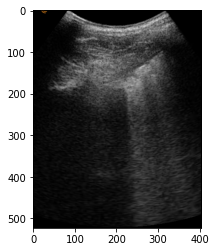

In [9]:
# test_df=test_df.reset_index()
plt.imshow(cv2.imread(cleaned.image_name.values.tolist()[0]))

In [10]:
def get_cms(model_name):

    cms = []
    classes=['alines','blines','consolidation','effusion']
    model = Eff(model_name)
    latest=tf.train.latest_checkpoint('../train_weights_combined5/efficientnetB0')
    model.load_weights(latest)
    preds=[]
    y_true=cleaned[['alines','blines','consolidation','effusion']].values.tolist()
    trues=[]
    for a,path in enumerate(cleaned.image_name.values.tolist()):
        try:
            img = cv2.imread(path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #         img=preprocess_img(img)
    #         img=A.CLAHE(clip_limit=5.0, tile_grid_size=(10,10), always_apply=False, p=1.0)(image=img)
            img=cv2.resize(img,(224,224))
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            img = np.expand_dims(img,0)
            preds.append(model.predict(img))
            trues.append(y_true[a])
            print(a)
        except:
#             print(a)
            continue

#     y_true=test_df[['alines','blines','consolidation','effusion']].values
    y_pred=np.round(np.squeeze(np.array(preds)),0)
    cm=multilabel_confusion_matrix(trues, y_pred)
    print(cm)
    fig,axes = plt.subplots(1,4,figsize=(15,3))
#     fig.suptitle('FOLD-{}'.format(fold), fontsize=16)
    a=0
    for i in range(4):
        sn.heatmap(ax=axes[i],data=cm[a],annot=True)
        axes[i].set_title(classes[a])
        a+=1

    plt.show()
    
    return y_pred,trues ,cm
    

2022-06-03 00:31:30.567731: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-03 00:31:30.569048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-03 00:31:32.703239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 00:31:32.703973: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-06-03 00:31:32.704031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-03 00:31:32.706158: I tensorflow/stream_executor/platform/default/dso_lo

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[[[ 30  17]
  [  1 152]]

 [[160  15]
  [  2  23]]

 [[185   0]
  [ 15   0]]

 [[189   0]
  [  9   2]]]


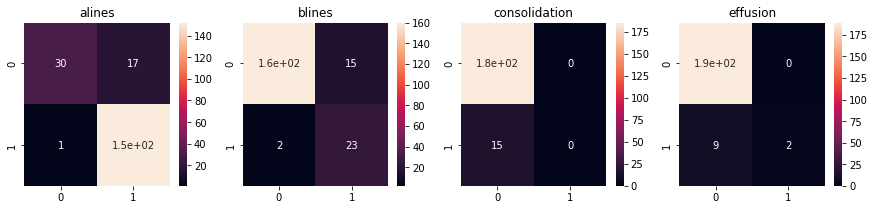

In [11]:
pred,true,_=get_cms('efficientnetB0')

In [10]:
equate=pred==true
def find_(row):
    return row[0]&row[1]&row[2]&row[3]
returned=np.apply_along_axis(find_,1,equate)
true_pred=np.where(returned==True)
false_pred=np.where(returned==False)

In [12]:
false_pred

(array([  0,   6,   7,   8,  14,  15,  20,  24,  26,  27,  29,  36,  43,
         44,  51,  57,  65,  75,  85,  92,  93,  94,  95, 100, 101, 102,
        103, 104, 109, 113, 121, 122, 129, 152, 154, 155, 159, 173, 175,
        183, 184, 188, 190, 193, 197]),)

In [ ]:
# true_indxs=true_pred[:20]
# true_indxs

In [ ]:
# test_df

In [21]:
true=np.array(true)
pred=np.array(pred)

In [ ]:
true_pred

In [22]:
def display_results(indxs):
    choice_indx=np.random.choice(np.arange(len(indxs)),size=40,replace=False)
    selected_indxs = indxs[choice_indx]
    print(selected_indxs)
    fig,axes=plt.subplots(10,4,figsize=(15,40))
    classes=np.array(['alines','blines','consolidation','effusion'])
    a=0
    for i in range(10):
        for j in range(4):
            selected_indxs[a]
            k=cv2.imread(test_df.image.values.tolist()[selected_indxs[a]])
            k=cv2.cvtColor(k,cv2.COLOR_BGR2RGB)
#             k =preprocess_img(k)
            axes[i,j].imshow(k)

            true_class_indxs = np.where(true[selected_indxs[a]]>0)[0]
            pred_class_indxs = np.where(pred[selected_indxs[a]]>0)[0]
            axes[i,j].set_title("Pred--{} \nTrue--{}".format(classes[pred_class_indxs],classes[true_class_indxs]))
            a+=1
    plt.show()

[190  24   0  15   6 154 188  29 197  95 109 122  75 103  27 100 184 152
 129   8 113 175   7  14  93  57  51 102 159 193 121  44 104  20  26 173
 183  36 155  85]


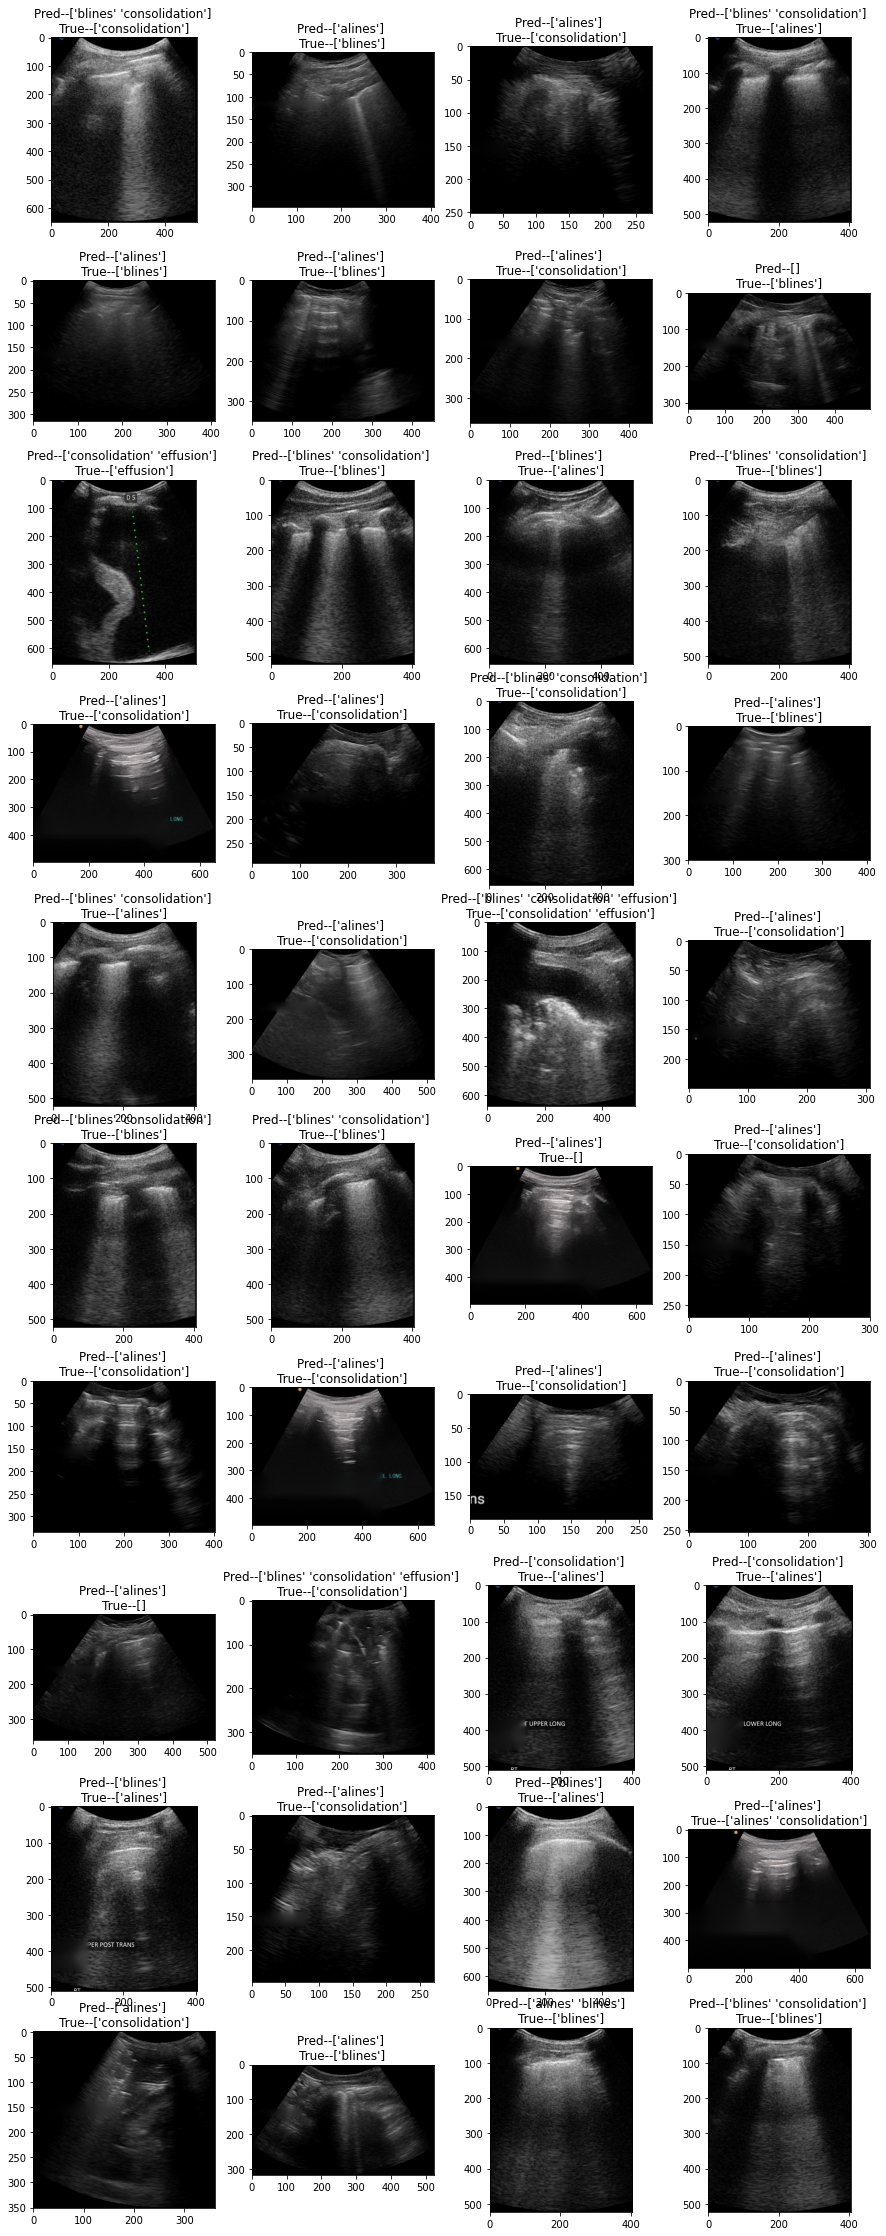

In [24]:
display_results(false_pred[0])

In [ ]:
[[[ 24  27]
  [  8 136]]

 [[165   9]
  [ 10  11]]

 [[149  17]
  [ 16  13]]

 [[184   0]
  [  1  10]]]

In [ ]:
import numpy as np
sd=np.array([[[24,27],[8,136]],[[165,9],[10,11]],[[149,17],[16,13]],[[184, 0],[1 ,10]]])

In [ ]:
for mat in sd:
    print(np.diag(mat)/np.sum(mat,axis=1))

In [ ]:
Recall = TP / (TP+FN)

In [ ]:
sensitivity=[]
for mat in sd:
    sensitivity.append(np.array(mat[1][1])/np.sum(mat,axis=1)[1])

In [ ]:
sum(sensitivity)/4

In [ ]:
for mat in sd:
    print(mat[1][1])

In [ ]:
mat.sum(axis=1)[1]

In [ ]:
np.sum(mat,axis=1)

In [ ]:
specitivity=[]
for mat in sd:
    specitivity.append(mat[0][0]/np.sum(mat,axis=1)[0])

In [ ]:
sum(specitivity)/4

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
p=np.array(true).reshape(-1,4)

In [ ]:
t=np.array(pred).reshape(-1,4)

In [ ]:
precision=[]
recall=[]
for i in range(4):
    precision.append(classification_report(p[:,i],t[:,i],output_dict=True)['1.0']['precision'])
    recall.append(classification_report(p[:,i],t[:,i],output_dict=True)['1.0']['recall'])

In [ ]:
sum(recall)/4

In [ ]:
sum(precision)/4

In [ ]:
from sklearn.metrics import hamming_loss

In [ ]:
hamming_loss(t,p)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(t[...,i], p[..., i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(t.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
roc_auc

In [ ]:
plt.plot(
    fpr[3],
    tpr[3],
#     color="darkorange",
#     lw=2,
#     label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.show()

In [ ]:
!ls

In [ ]:
tf.train.latest_checkpoint('trainB2_')

In [ ]:
model.load_weights('trainB2_/cp-0077.ckpt')

In [ ]:
model(tf.random.normal((1,260,260,3)))

In [ ]:
def remove_text(img):
    def decode(scores, geometry, scoreThresh):
        detections = []
        confidences = []

        ############ CHECK DIMENSIONS AND SHAPES OF geometry AND scores ############
        assert len(scores.shape) == 4, "Incorrect dimensions of scores"
        assert len(geometry.shape) == 4, "Incorrect dimensions of geometry"
        assert scores.shape[0] == 1, "Invalid dimensions of scores"
        assert geometry.shape[0] == 1, "Invalid dimensions of geometry"
        assert scores.shape[1] == 1, "Invalid dimensions of scores"
        assert geometry.shape[1] == 5, "Invalid dimensions of geometry"
        assert scores.shape[2] == geometry.shape[2], "Invalid dimensions of scores and geometry"
        assert scores.shape[3] == geometry.shape[3], "Invalid dimensions of scores and geometry"
        height = scores.shape[2]
        width = scores.shape[3]
        for y in range(0, height):

            # Extract data from scores
            scoresData = scores[0][0][y]
            x0_data = geometry[0][0][y]
            x1_data = geometry[0][1][y]
            x2_data = geometry[0][2][y]
            x3_data = geometry[0][3][y]
            anglesData = geometry[0][4][y]
            for x in range(0, width):
                score = scoresData[x]

                # If score is lower than threshold score, move to next x
                if(score < scoreThresh):
                    continue

                # Calculate offset
                offsetX = x * 4.0
                offsetY = y * 4.0
                angle = anglesData[x]

                # Calculate cos and sin of angle
                cosA = math.cos(angle)
                sinA = math.sin(angle)
                h = x0_data[x] + x2_data[x]
                w = x1_data[x] + x3_data[x]

                # Calculate offset
                offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x], offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

                # Find points for rectangle
                p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
                p3 = (-cosA * w + offset[0],  sinA * w + offset[1])
                center = (0.5*(p1[0]+p3[0]), 0.5*(p1[1]+p3[1]))
                detections.append((center, (w,h), -1*angle * 180.0 / math.pi))
                confidences.append(float(score))

        # Return detections and confidences
        return [detections, confidences]
   
    net = cv2.dnn.readNet('frozen_east_text_detection.pb')
    blob = cv2.dnn.blobFromImage(img, 1.0, (320,320), (123.68, 116.78, 103.94), False, False)
    outputLayers = []
    outputLayers.append("feature_fusion/Conv_7/Sigmoid")
    outputLayers.append("feature_fusion/concat_3")
    net.setInput(blob)
    output = net.forward(outputLayers)
    scores = output[0]
    geometry = output[1]
    [boxes, confidences] = decode(scores, geometry, 0.99)
    indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, 0.5,0.5)
    collect=[]
    if len(boxes)!=0:
        for i in indices:
            # get 4 corners of the rotated rect
            vertices = cv2.boxPoints(boxes[i])
            # scale the bounding box coordinates based on the respective ratios
            for j in range(4):
                vertices[j][0] *=img.shape[1]/320
                vertices[j][1] *= img.shape[0]/320
            for j in range(4):
                p1 = (vertices[j][0], vertices[j][1])
                p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
                collect.append(p1)   
        collect=np.array(collect)
        mse=lambda x:x[0]**2+x[1]**2
        mse=np.apply_along_axis(mse,1,collect)
        sqrt = np.sqrt(mse)   
        min_=collect[np.argmin(sqrt)].astype('int').tolist()
        max_=collect[np.argmax(sqrt)].astype('int').tolist()

        min_[np.where(np.array(min_)<0)[0].tolist()[0]]=0
    else:
        min_,max_= [0,0],[0,0]
    
    mask=np.zeros((img.shape[:-1]))
    mask[min_[1]:max_[1],min_[0]:max_[0]]=255
    img[min_[1]:max_[1],min_[0]:max_[0]]=0
    img=cv2.inpaint(img.astype('uint8'),mask.astype('uint8'),4,cv2.INPAINT_TELEA)
    return img

In [ ]:
j=remove_text(k)

In [ ]:
# cv2.rectangle(k,p1,p2,(0,0,0),4)
plt.imshow(j)

In [ ]:
circles

In [ ]:
import math
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

In [ ]:
blob = cv2.dnn.blobFromImage(k, 1.0, (320,320), (123.68, 116.78, 103.94), True, False)

In [ ]:
outputLayers = []
outputLayers.append("feature_fusion/Conv_7/Sigmoid")
outputLayers.append("feature_fusion/concat_3")

In [ ]:
net.setInput(blob)
output = net.forward(outputLayers)

In [ ]:
scores = output[0]
geometry = output[1]
[boxes, confidences] = decode(scores, geometry, 0.99)

In [ ]:
indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, 0.5,0.5)

In [ ]:
collect=[]
for i in indices:
    # get 4 corners of the rotated rect
    vertices = cv2.boxPoints(boxes[i])
    # scale the bounding box coordinates based on the respective ratios
    for j in range(4):
        vertices[j][0] *=k.shape[1]/320
        vertices[j][1] *= k.shape[0]/320
    for j in range(4):
        p1 = (vertices[j][0], vertices[j][1])
        p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
        collect.append(p1)
        cv2.line(k, np.array(p1,dtype='int').tolist(), np.array(p2,dtype='int').tolist(), (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(k)
plt.show()

In [ ]:
collect=np.array(collect)

In [ ]:
collect

In [ ]:
mse=lambda x:x[0]**2+x[1]**2

mse=np.apply_along_axis(mse,1,collect)
sqrt = np.sqrt(mse)

In [ ]:
collect[np.argmin(sqrt)].astype('int')

In [ ]:
cv2.rectangle(k,(-4,164),(132,183),(0,0,0),4)
plt.imshow(k)

In [ ]:
371/320

In [ ]:
467/320

In [ ]:
plt.imshow(k)

In [ ]:
p2

In [ ]:
700/320

In [ ]:
boxes

In [ ]:
confidences

In [ ]:
indices

In [ ]:
import os
os.listdir('../dataset/denoised_data')